In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [11]:
class LIF:
    def __init__(self, v_threshold = -55, v_rest=-75, tau_m=10, g_l=10, v_init=-75, E_l=-75, t_refactory=2, final_time=400, time_step=0.1):
        self.v_threshold = v_threshold
        self.v_rest = v_rest
        self.tau_m = tau_m
        self.g_l = g_l
        self.v_init = v_init
        self.E_l = E_l
        self.t_refactory = t_refactory
        self.final_time = final_time
        self.time_step = time_step

        self.R_l = (1/self.g_l)/ 1000000

        self.range = np.arange(0, self.final_time, self.time_step)

        self.resulting_amp = 0
        self.cross_corr =0

    def model(self, const_I=10, mode='constant', freq = 1, amp = 1):
        step_length = self.range.size
        self.v_list = np.zeros(step_length)
        self.v_list[0] = self.v_init
        self.spike_times = []
        if mode =='constant':
            self.I_list = const_I* np.ones(step_length)
        elif mode == 'sin':
            self.I_list = amp* np.sin(2 * np.pi *freq* self.range/1000)

        tr = 0.
        for step in range(step_length-1):
            if tr >0:
                self.v_list[step] = self.v_rest
                tr = tr-1
            elif self.v_list[step] >= self.v_threshold:         #reset voltage and record spike event
                self.spike_times.append(step)
                self.v_list[step] = self.v_rest
                tr = self.t_refactory/self.time_step
            #calculate the increment of the membrane potential
            dv = (-(self.v_list[step]-self.E_l) + self.I_list[step]/self.g_l) * (self.time_step/self.tau_m)
            #print(dv)
            #update the membrane potential
            self.v_list[step+1] = self.v_list[step] + dv
        
        self.spike_times = np.array(self.spike_times) * self.time_step
        self.resulting_amp = max(self.v_list)
        self.cross_corr = max(sp.signal.correlate(self.I_list, self.v_list, method='fft'))
        # def plots
        return self.v_list, self.spike_times

    def plot(self):
        fig = plt.figure(figsize=(30, 15))
        ax = plt.subplot(211)
        ax.set_title("Membrane potential during time")
        ax.plot(self.range,self.v_list, label='membrane potential')
        ax.plot(self.range, [self.v_threshold for i in range(self.range.size)], '--r', label='threshold')
        ax.set_ylabel('Voltage (Vm)')
        ax.set_xlabel('Time (ms)')
        ax.legend()

        ax2 = plt.subplot(212)
        ax2.set_title("injected current during time")
        ax2.plot(self.range, self.I_list)
        ax2.set_ylabel('Current (micro A)')
        ax2.set_xlabel('Time (ms)')

        plt.legend()
        plt.show()
        
        

# Simulation Questions

# 1. 

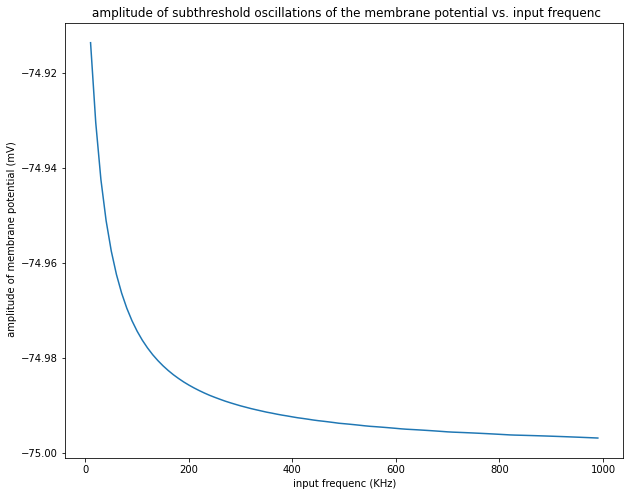

In [12]:
freq_range = np.arange(10, 1000, 10)
amp_list = []
cross_corr_list = []
for f in freq_range:
    lif = LIF()
    _, _ = lif.model(mode='sin', freq=f)
    amp_list.append(lif.resulting_amp)
    cross_corr_list.append(lif.cross_corr)

plt.figure(figsize=(10, 8))
plt.title(" amplitude of subthreshold oscillations of the membrane potential vs. input frequenc")
plt.xlabel('input frequenc (KHz)')
plt.ylabel(' amplitude of membrane potential (mV)')
plt.plot(freq_range,amp_list)
plt.show()
    

# 2.

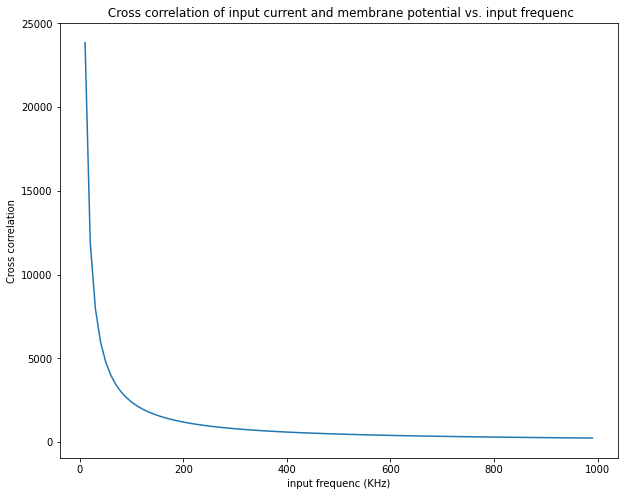

In [13]:

plt.figure(figsize=(10, 8))
plt.title(" Cross correlation of input current and membrane potential vs. input frequenc")
plt.xlabel('input frequenc (KHz)')
plt.ylabel('Cross correlation')
plt.plot(freq_range,cross_corr_list)
plt.show()

# 3.

No handles with labels found to put in legend.


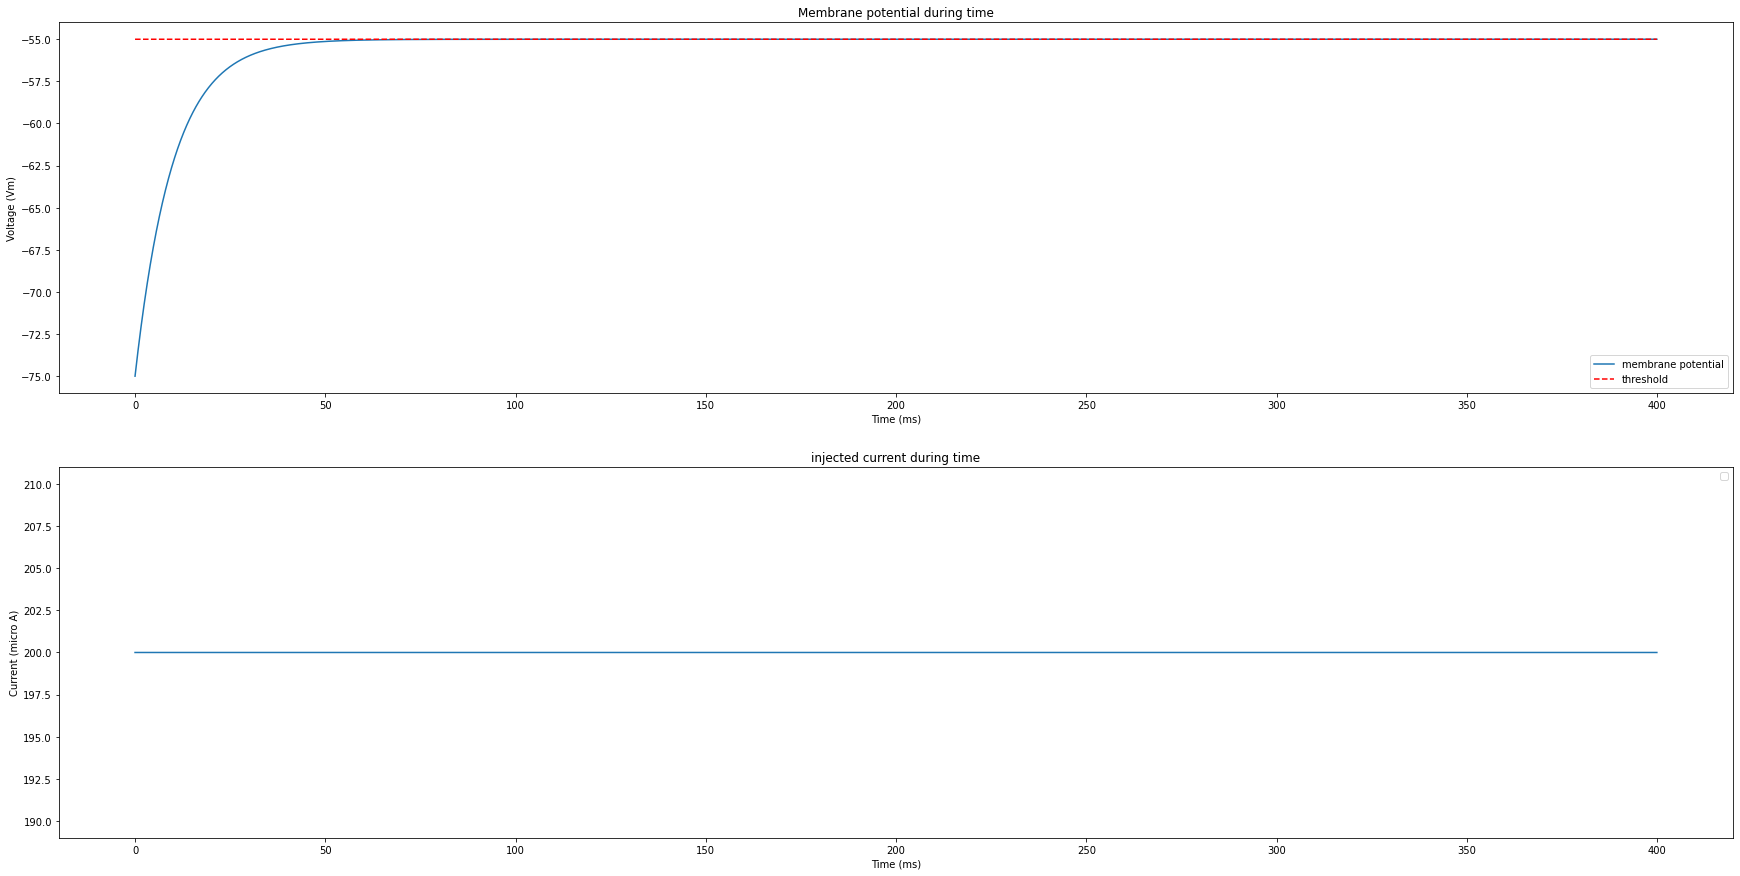

In [14]:
lif = LIF()

v, rec_spikes = lif.model(const_I = 200)
lif.plot();

No handles with labels found to put in legend.


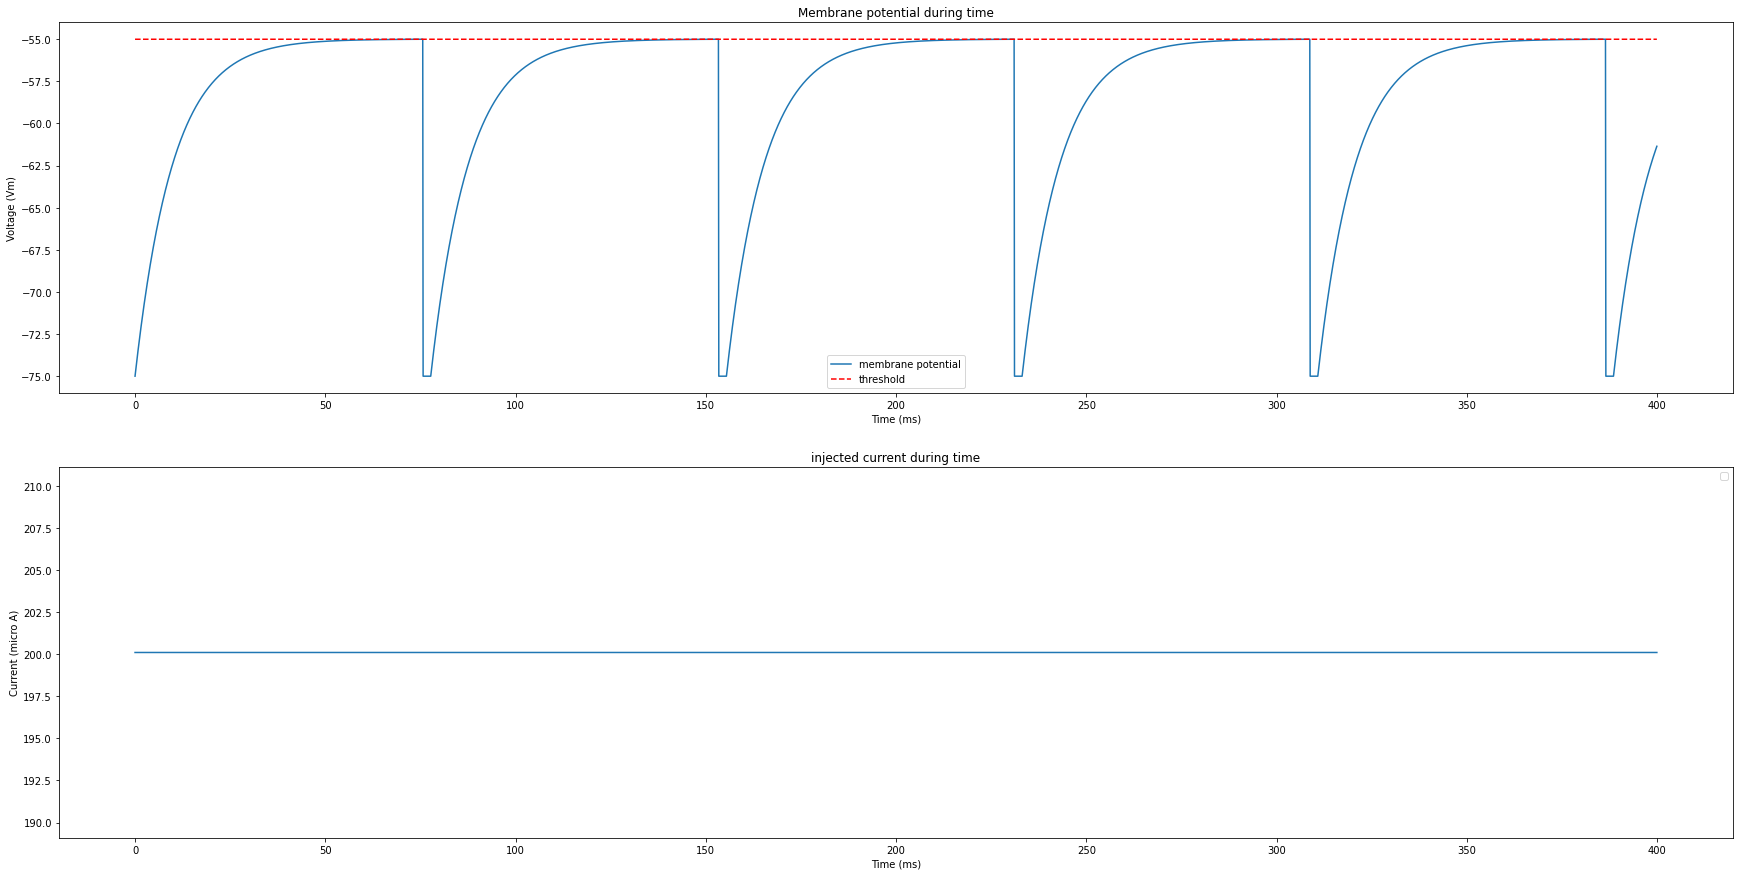

In [15]:
lif = LIF()

v, rec_spikes = lif.model(const_I = 200.1)
lif.plot();

No handles with labels found to put in legend.


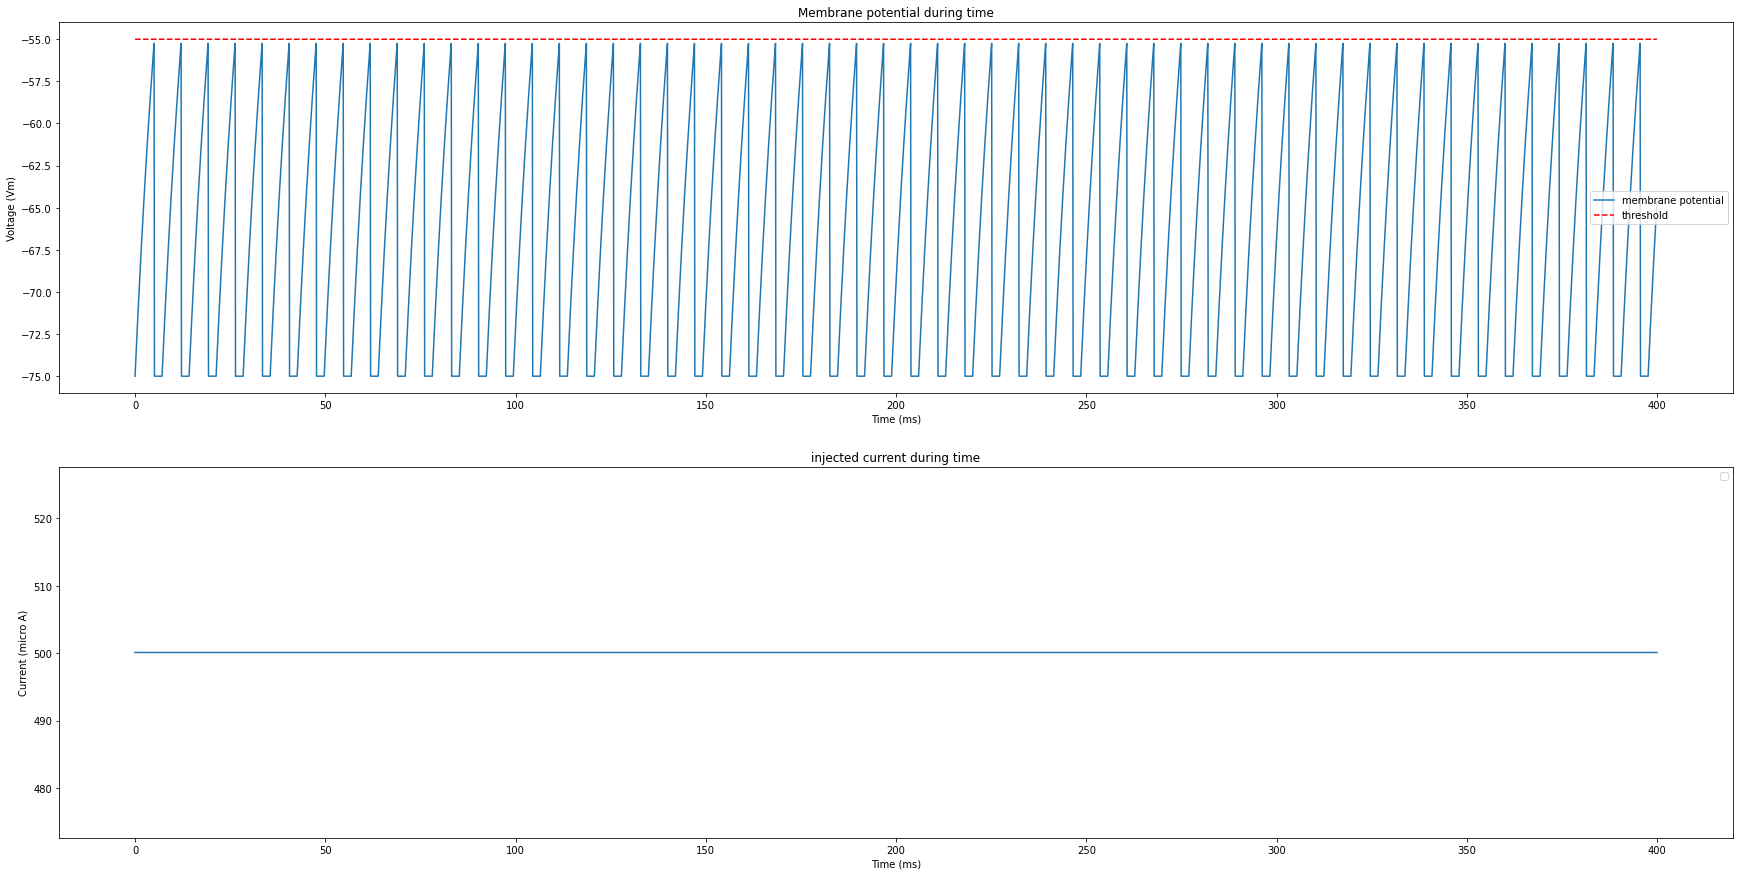

In [16]:
lif = LIF()

v, rec_spikes = lif.model(const_I = 500.1)
lif.plot();

No handles with labels found to put in legend.


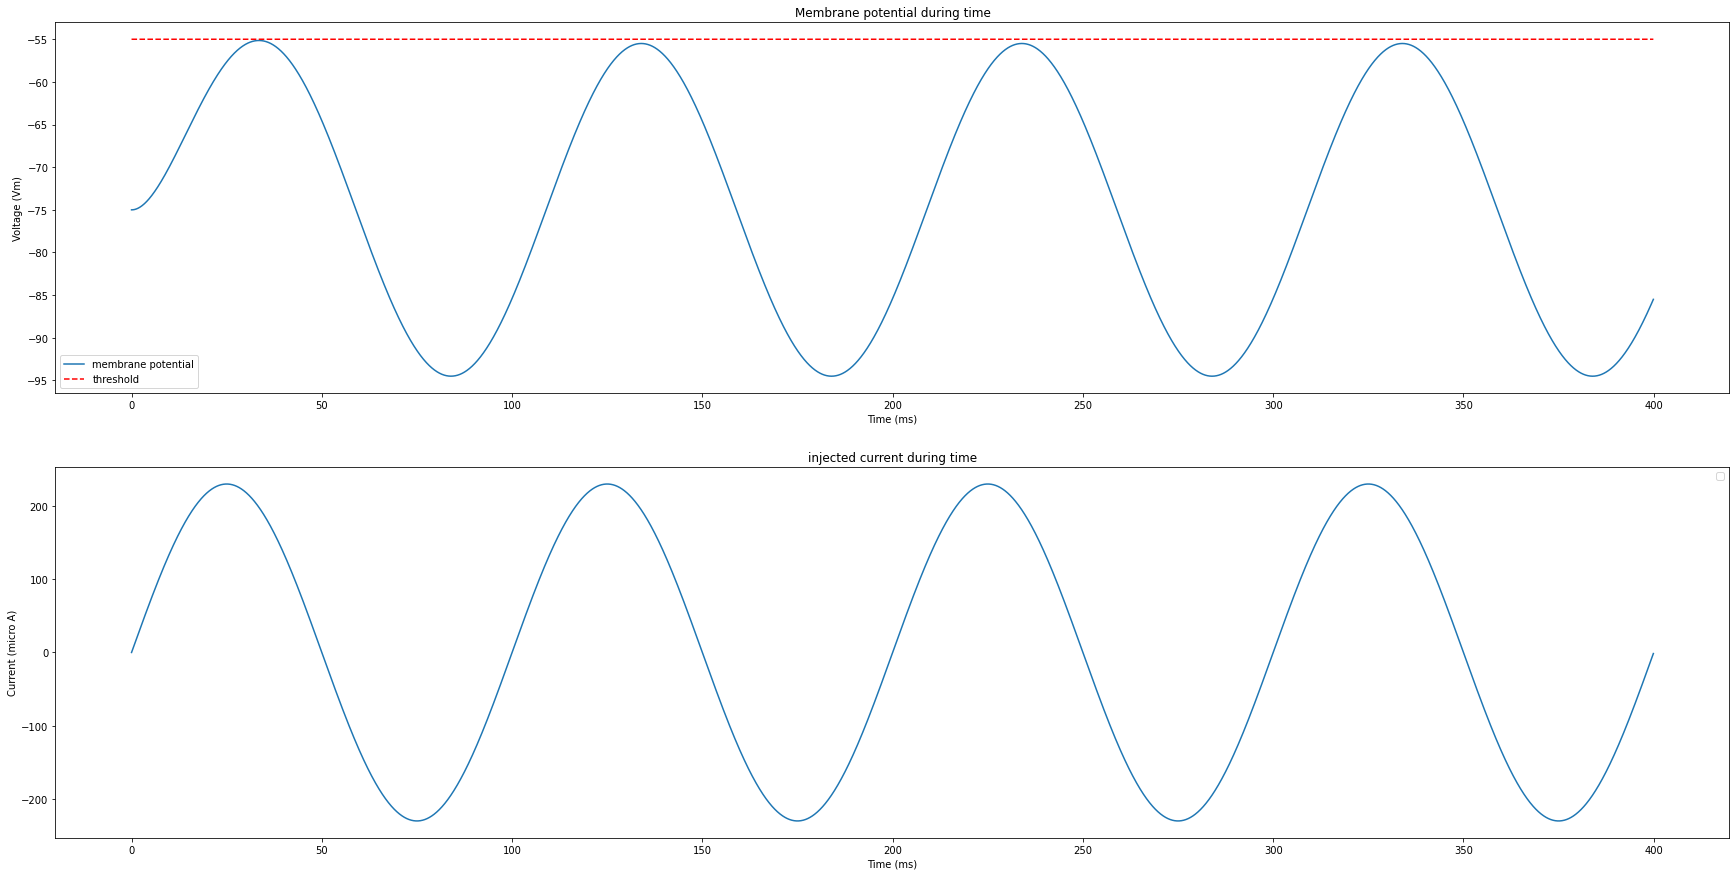

In [17]:
lif = LIF()

v, rec_spikes = lif.model(mode='sin', freq=10, amp=230)
lif.plot()

No handles with labels found to put in legend.


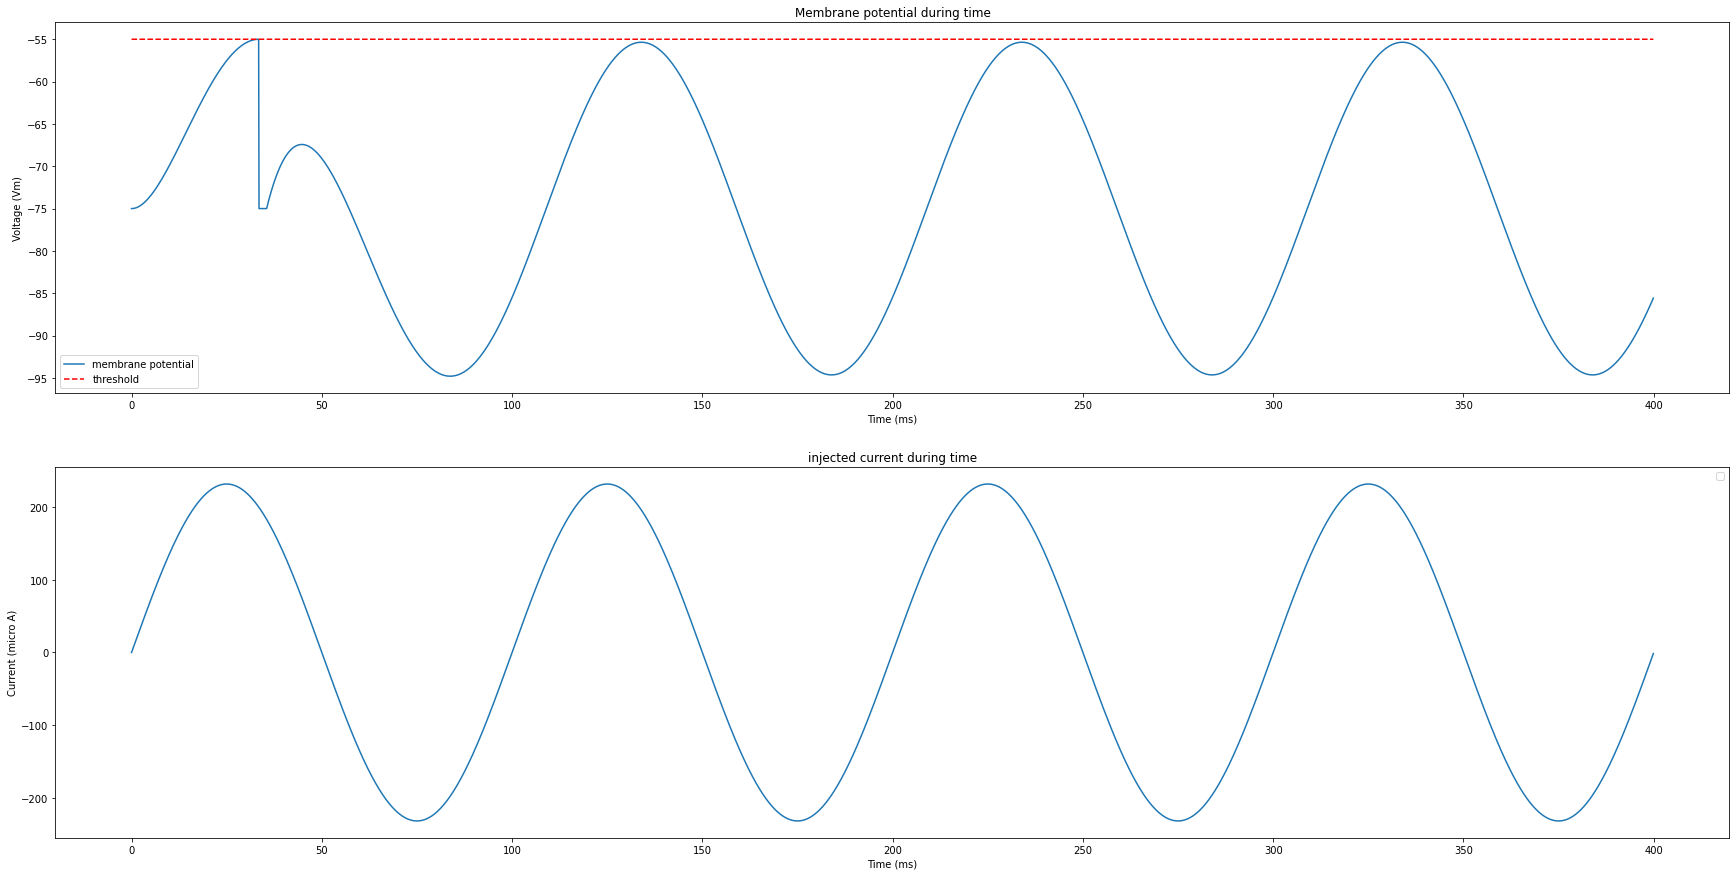

In [18]:
lif = LIF()

v, rec_spikes = lif.model(mode='sin', freq=10, amp=231.699)
lif.plot()

No handles with labels found to put in legend.


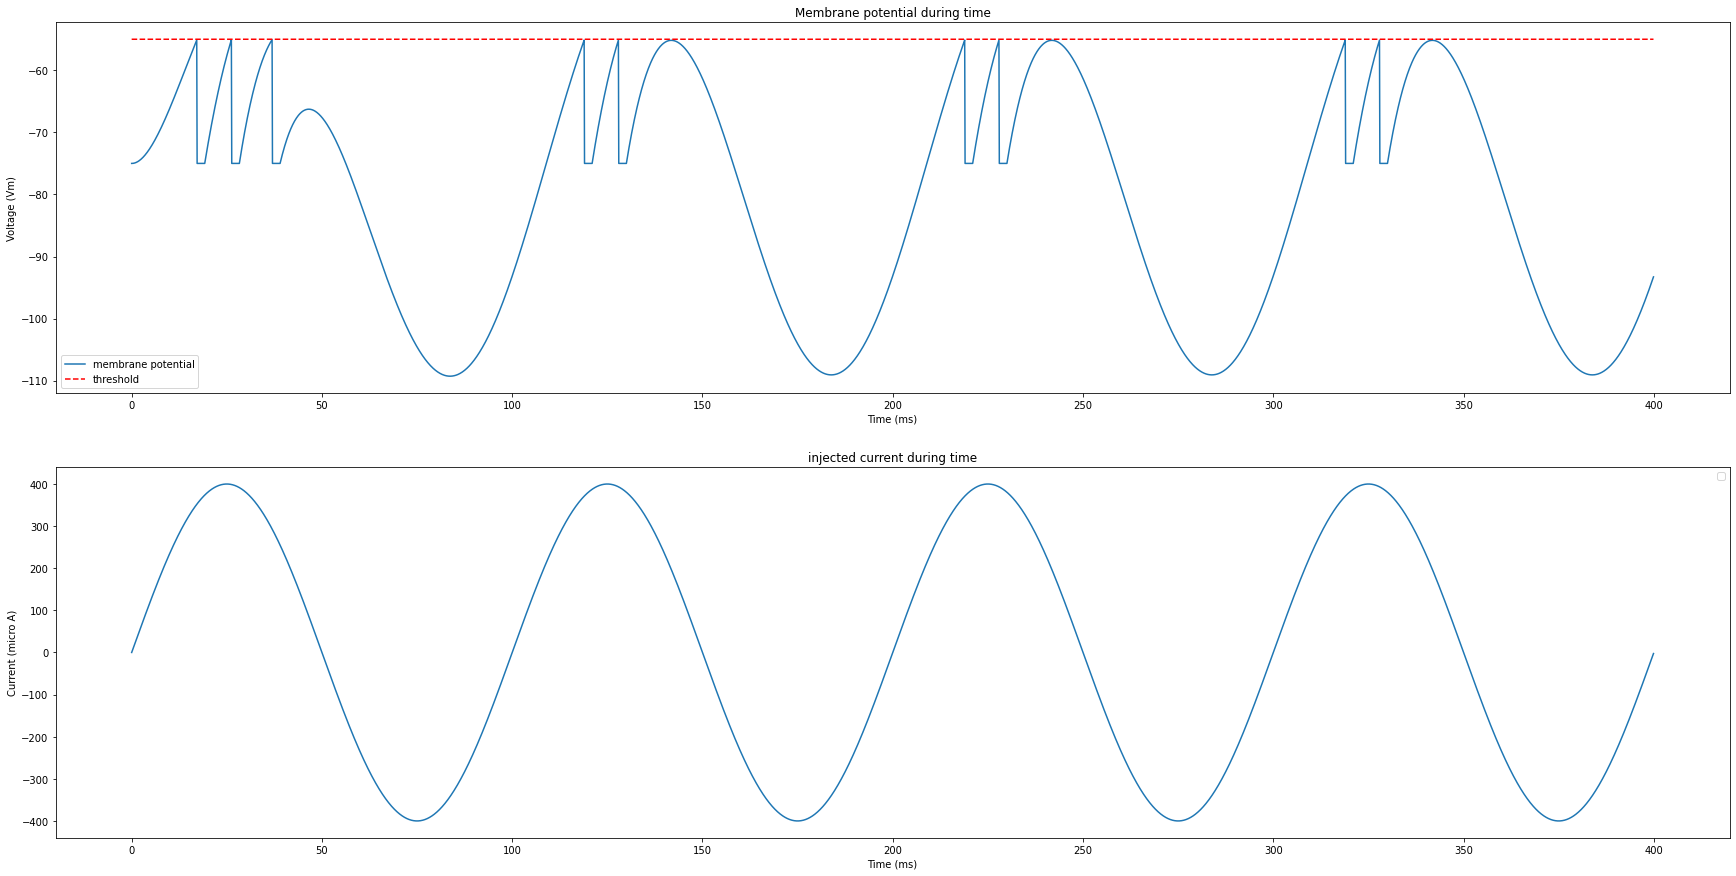

In [19]:
lif = LIF()

v, rec_spikes = lif.model(mode='sin', freq=10, amp=400)
lif.plot()

# 4.

In [21]:
currents = np.linspace(200, 100000, 1000)
freq_list = []
for i in currents:
    lif = LIF(t_refactory=3)
    _,_ = lif.model(const_I=i)
    if lif.spike_times.size >0:
        T = lif.spike_times[1] - lif.spike_times[0]
        freq_list.append(1/T)
    else:
        freq_list.append(0)

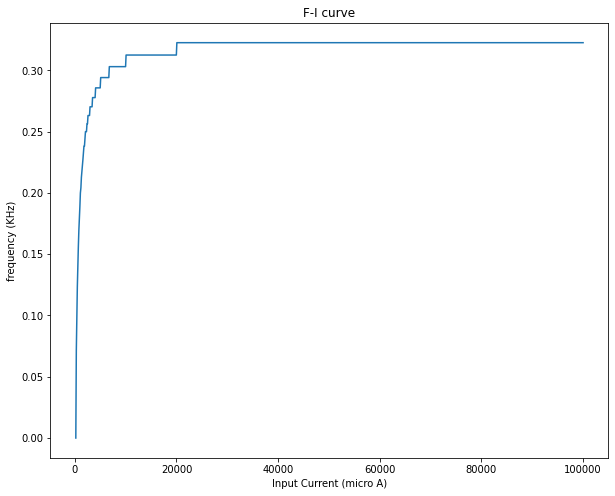

In [23]:
plt.figure(figsize=(10, 8))
plt.title("F-I curve")
plt.ylabel('frequency (KHz)')
plt.xlabel('Input Current (micro A)')
plt.plot(currents, freq_list)
plt.show()

In [143]:
1/ freq_list[np.where(currents > 20000)[0][0]] 

3.1